# Аугментации
Можем перейти к непосредственному применению аугментаций. Для этого будем использовать уже знакомый нам класс Dataset.

In [2]:
from PIL import Image
import os
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import numpy as np


/Users/ilkhom/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## torchvision.transforms

In [3]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, path_data, transforms):
        self.path_data = path_data
        self.image_paths = os.listdir(self.path_data)
        self.transforms = transforms
    def __len__(self):
        return len(self.image_paths)
    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.path_data, self.image_paths[idx]))
        image = self.transforms(image)

        return torch.FloatTensor(image)

In [4]:
data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.RandomApply(
            torch.nn.ModuleList([
                                 transforms.ColorJitter(brightness=0.2, contrast=0.8, saturation=0.3, hue=0.2)]),
                               p = 0.5),
        transforms.RandomRotation((-30,30)),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

In [5]:
train_data = Dataset('content/cats', transforms=data_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/cats'

In [ ]:
imgs = next(iter(train_loader))

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


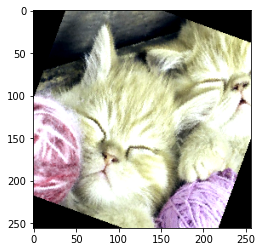

In [ ]:
imshow(imgs[0])

## albumentations

In [ ]:
import numpy as np
class Dataset(torch.utils.data.Dataset):
    def __init__(self, path_data, transforms):
        self.path_data = path_data
        self.image_paths = os.listdir(self.path_data)
        self.transforms = transforms
    def __len__(self):
        return len(self.image_paths)
    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.path_data, self.image_paths[idx]))
        image = self.transforms(image=np.array(image))['image']

        return torch.FloatTensor(image)

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.show()

In [ ]:
import albumentations as A
alb_transforms = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.MedianBlur(),
    A.RandomGamma(),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [ ]:
train_data = Dataset('/content/cats', transforms=alb_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)

In [ ]:
imgs = next(iter(train_loader))

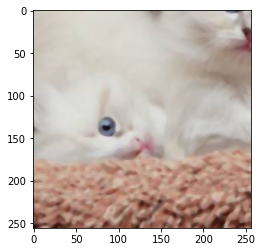

In [ ]:
plt.imshow(imgs[0].numpy().astype(int))